In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import 
import numpy as np
from implementations import *

# Load data

In [2]:
from proj1_helpers import load_csv_data 

# load 
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# Handle outliers

In [3]:
from outliers import handle_outliers

# outliers
X, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

-999 are replaced by the median value of the feature


# Standardize

In [4]:
from standard import standardize

# standardize
X, mean_x, std_x = standardize(X)

# Feature names and index

In [5]:
# names of the features 
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]

for ind, name in enumerate(featureNames):
    print(name, '( index:', ind, ')')

DER_mass_MMC ( index: 0 )
DER_mass_transverse_met_lep ( index: 1 )
DER_mass_vis ( index: 2 )
DER_pt_h ( index: 3 )
DER_deltaeta_jet_jet ( index: 4 )
DER_mass_jet_jet ( index: 5 )
DER_prodeta_jet_jet ( index: 6 )
DER_deltar_tau_lep ( index: 7 )
DER_pt_tot ( index: 8 )
DER_sum_pt ( index: 9 )
DER_pt_ratio_lep_tau ( index: 10 )
DER_met_phi_centrality ( index: 11 )
DER_lep_eta_centrality ( index: 12 )
PRI_tau_pt ( index: 13 )
PRI_tau_eta ( index: 14 )
PRI_tau_phi ( index: 15 )
PRI_lep_pt ( index: 16 )
PRI_lep_eta ( index: 17 )
PRI_lep_phi ( index: 18 )
PRI_met ( index: 19 )
PRI_met_phi ( index: 20 )
PRI_met_sumet ( index: 21 )
PRI_jet_num ( index: 22 )
PRI_jet_leading_pt ( index: 23 )
PRI_jet_leading_eta ( index: 24 )
PRI_jet_leading_phi ( index: 25 )
PRI_jet_subleading_pt ( index: 26 )
PRI_jet_subleading_eta ( index: 27 )
PRI_jet_subleading_phi ( index: 28 )
PRI_jet_all_pt ( index: 29 )


# Split data into training and testing sets

In [6]:
from split_data import split_data

# ratio (training)
ratio = 0.6
seed = 1

# split
X_tr, y_tr, X_te, y_te = split_data(X, y, ratio, seed)

print('training samples:', X_tr.shape[0])
print('testing samples:', X_te.shape[0])

training samples: 150000
testing samples: 100000


# Training

In [17]:
from build_poly import build_poly

# choose features
ind_features = range(1,30)

# degree of polynomial basis function
degree = 1

# lambda
lambda_ = 0.00028

# build the function
phi_tr = build_poly(X_tr[:,ind_features], degree)

# ridge regression
w_rr, loss_rr = ridge_regression(y_tr, phi_tr, lambda_)

# Testing

In [18]:
from proj1_helpers import predict_labels

# build the function
phi_te = build_poly(X_te[:,ind_features], degree)

# predict
y_pred = predict_labels(w_rr, phi_te)

# classification_error error
classification_error_error = len(np.argwhere(y_te-y_pred))/len(y_te)*100

print("labels: ", y.shape[0])
print("classification error: ", classification_error_error)

labels:  250000
classification error:  25.637


# Optimize the degree when lambda is 0

Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
optimal degree (lambda=0):  1


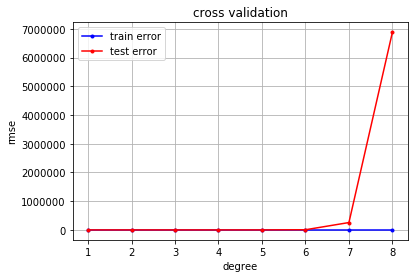

In [7]:
from cross_validation_ridge_regression import *

# choose features
ind_features = range(1,30)

# parameters
degree_min = 1
degree_max = 8
lambda_ = 0
k_fold = 10

# cross validation
degree_opt, rmse_tr, rmse_te = cross_validation_degree_ridge_regression(y, X[:,ind_features], lambda_, degree_min, degree_max, k_fold)

print('optimal degree (lambda=0): ', degree_opt)

<function matplotlib.pyplot.show>

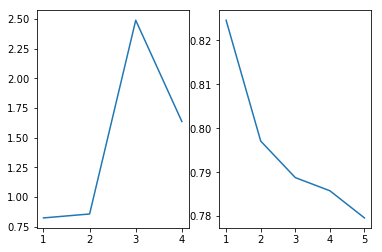

In [15]:
plt.figure
plt.subplot(121)
plt.plot([1,2,3,4], rmse_te[:4])
plt.subplot(122)
plt.plot([1,2,3,4,5], rmse_tr[:5])
plt.show

# Optimize lambda with the previous degree

Number of samples in total:  250000
Number of folds:  10  of 25000 samples.
optimal lambda (degree= 1 ):  0.000268269579528


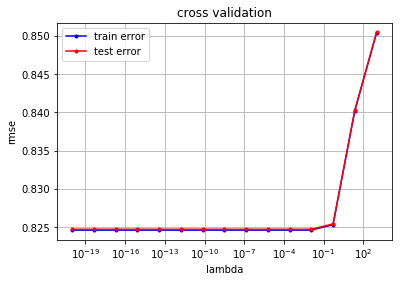

In [16]:
from cross_validation_ridge_regression import *

# choose features
ind_features = range(1,30)

# parameters
lambda_min = -20
lambda_max = 3
lambda_steps = 15
lambda_ = 0
k_fold = 10

# cross validation
lambda_opt, rmse_tr, rmse_te = cross_validation_lambda_ridge_regression(y, X[:,ind_features], degree_opt, lambda_min, lambda_max, lambda_steps, k_fold, 1)

print('optimal lambda (degree=',degree_opt,'): ', lambda_opt)

# Mean and variance of the training and testing error

Number of samples in total:  68114
Number of folds:  20  of 3405 samples.
Number of samples in total:  68114
Number of folds:  20  of 3405 samples.
Number of samples in total:  68114
Number of folds:  20  of 3405 samples.


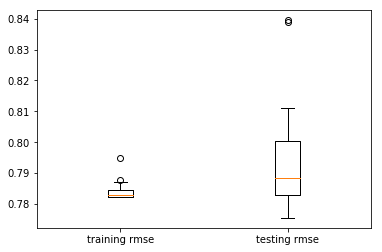

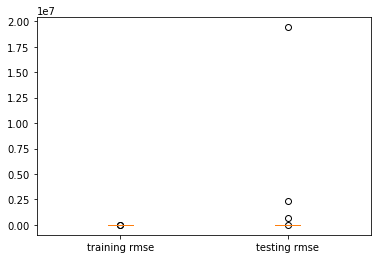

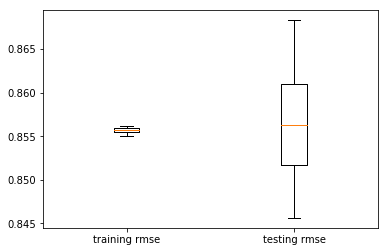

In [93]:
from cross_validation_ridge_regression import *

# hyper-parameters (optimal)
lambda_ = 1.63e-12
degree = 4
k_fold = 50
mean_rmse_tr, mean_rmse_te, std_rmse_tr, std_rmse_te = cross_validation_rmse_ridge_regression(y, X, lambda_, degree, k_fold)

# hyper-parameters (overfitting)
lambda_ = 0
degree = 15
mean_rmse_tr, mean_rmse_te, std_rmse_tr, std_rmse_te = cross_validation_rmse_ridge_regression(y, X, lambda_, degree, k_fold)

# hyper-parameters (underfitting)
lambda_ = 10
degree = 2
mean_rmse_tr, mean_rmse_te, std_rmse_tr, std_rmse_te = cross_validation_rmse_ridge_regression(y, X, lambda_, degree, k_fold)

# Mean and variance of the classification error and class error

In [101]:
from cross_validation_ridge_regression import *

# hyper-parameters (optimal)
lambda_ = lamnda_opy
degree = degree_opt
k_fold = 25
mean_classification_error, std_classification_error = cross_validation_classification_ridge_regression(y, X, lambda_, degree, k_fold)
print('\n lambda: ', lambda_, 'degree:', degree)
print('mean classification error:', mean_classification_error)
print('variance classification error:', std_classification_error**2, '\n')

# hyper-parameters (overfitting)
lambda_ = 0
degree = 15
mean_classification_error, std_classification_error = cross_validation_classification_ridge_regression(y, X, lambda_, degree, k_fold)
print('\n lambda: ', lambda_, 'degree:', degree)
print('mean classification error:', mean_classification_error)
print('variance classification error:', std_classification_error**2, '\n')

# hyper-parameters (underfitting)
lambda_ = 10
degree = 2
mean_classification_error, std_classification_error = cross_validation_classification_ridge_regression(y, X, lambda_, degree, k_fold)
print('\nlambda: ', lambda_, 'degree:', degree)
print('mean classification error:', mean_classification_error)
print('variance classification error:', std_classification_error**2, '\n')



Number of samples in total:  68114
Number of folds:  50  of 1362 samples.


KeyboardInterrupt: 